# Ejercicios entregagles de Matematicas para IA

## Alumno
Peralta Rodrigo

- [Introducción](#introducción)
- [Ejercicio 1](#ejercicio-1)
- [Ejercicio 2](#ejercicio-2)

## Introduccion <br>
Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el algebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de t ecnicas relacionadas con el aprendizaje automatico.<br> 
Con ella, podemos describir el proceso de propagacion hacia adelante en una red neuronal, identificar m ́ınimos locales en funciones multivariables (crucial para el proceso de retropropagaci ́on) o la descripci ́on y empleo de metodos de reducci ́on de la dimensionalidad, como el an ́alisis de componentes principales (PCA), entre muchas otras aplicaciones.

In [ ]:
# Imports globales
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ejercicio 1
Cuando trabajamos en la practica dentro de este ́ambito, la cantidad de datos que manejamos
puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes
y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello,
el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir
para realizar un proceso relacionado con el algebra lineal y el impacto que puede tener cada
variante en terminos del coste computacional del mismo. En este caso en particular, y a modo
de ilustracion, nos centraremos en el calculo del determinante de una matriz.


a) [1 punto] Implementa una funcion, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definicion recursiva de Laplace.'''

In [ ]:
def determinante_recursivo(matriz):
    if len(matriz) == 1: # Caso base: matriz 1x1
        return matriz[0][0]
    
    if len(matriz) == 2: # Caso base: matriz 2x2
        return matriz[0][0] * matriz[1][1] - matriz[0][1] * matriz[1][0]
    
    det = 0
    for c in range(len(matriz)):
        # Calculo de Cofactor
        cofactor = [[matriz[i][j] for j in range(len(matriz)) if j != c] for i in range(1, len(matriz))]
        det += ((-1) ** c) * matriz[0][c] * determinante_recursivo(cofactor)
    
    return det

A = np.array([[1, 5],[4, -6]])
determinante = determinante_recursivo(A)
print("Determinante:", determinante)

Determinante: -26


b) [0.5 puntos] Si A es una matriz cuadrada n x n y triangular (superior o inferior, es decir, 
con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y 
sencilla su determinante? Justifiquese la respuesta.

Sí, el determinante de una matriz triangular (ya sea superior o inferior) se calcula como el producto de los elementos de la diagonal principal.

Esto se debe a que los determinantes de matrices triangulares son iguales al producto de sus entradas diagonales, ya que las operaciones de eliminación de filas no afectan el determinante. (al multiplicar por cero los elementos solo quedan la multiplicacion de de la diagonal)

c) [0.5 puntos] Determinese de forma justificada como alteran el determinante de una matriz n x n las dos operaciones elementales siguientes:<br>
1:Intercambiar una fila (o columna) por otra fila (o columna).<br>
2:Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

1:<br>
Intercambiar dos filas o dos columnas cambia el signo del determinante.<br>
Explicacion: <br>

Supongamos que tenmemos una matriz cuadrada n × n (A) e intercambiamos dos filas cualesquiera i y j con i≠j<br>
Obetenemos una matrix B después de intercambiar las filas. <br>
La propiedad básica del determinante establece que al intercambiar dos filas (o dos columnas) de una matriz, el determinante cambia de signo. Esto es: det(B) = −det(A) <br>

Suponiendo una matriz de 2 x 2  A=[[a,b],[c,d]], det(A)= a*d - b*c<br>
Intercambienado las filas tenemos B=[[c,d],[a,b]], det(B)= c*b - d*a = - (a*d - b*c) = - det(A)<br>

2:<br>
Sumar a una fila (o columna) otra multiplicada por un escalar no altera el valor del determinante.<br>
Excplicacion: <br>
Por definición de determinante, esta operación no altera su valor porque equivale a una transformación elemental que no afecta la independencia lineal de las filas (o columnas). El determinante conserva la multilinealidad y la alternancia:<br>
El determinante es lineal respecto a cada fila (o columna) individualmente.<br>
Al sumar un múltiplo de otra fila (o columna) no se pierde independencia lineal ni se generan dependencias que alteren su valor.<br>

Volviendo al ejemplo anterior A=[[a,b],[c,d]], det(A)= ad - bc<br>
La nueva matriz B seria B=[[a+c*α,b+d*α],[c,d]], det(B)= (a+c*α)d - (b+d*α)c= a*d - b*c + α(c*d - d*c) =a*b - b*c = det(A)<br>

d) [1 punto] Investiga sobre el metodo de eliminacion de Gauss con pivoteo parcial e implementalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.

El método de eliminación de Gauss con pivoteo parcial es una técnica numérica utilizada para resolver sistemas de ecuaciones lineales de la forma: Ax = b<br>
Donde A es una matrix cuadrada n*n, x es el vector de incognitas y b es el valor de los terminos independientes.<br>
Este método combina la eliminación de Gauss tradicional (que transforma la matriz en una triangular superior) con una estrategia denominada pivoteo parcial, diseñada para mejorar la estabilidad numérica y minimizar los errores derivados de la división por números muy pequeños.<br>

In [16]:
def gauss_pivoteo_parcial(A, b):
    n = len(b)
    A = A.astype(float)
    b = b.astype(float)

    # Eliminación hacia adelante
    for k in range(n-1):
        # Pivoteo parcial: encuentra la fila con el mayor elemento absoluto en columna k
        max_row = np.argmax(abs(A[k:, k])) + k
        
        # Intercambiar filas si es necesario
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            b[[k, max_row]] = b[[max_row, k]]
        
        # Eliminación Gaussiana calculando el factor determinante
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] = A[i, k:] - factor * A[k, k:]
            b[i] = b[i] - factor * b[k]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

# Ejemplo de uso:
A = np.array([[1, 5],[4, -6]])
b = np.array([9, 4])

solucion = gauss_pivoteo_parcial(A, b)
print("Solución:", solucion)

Solución: [2.84615385 1.23076923]


In [18]:
'''e) [0.5 puntos] ¿Como se podria calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto 
de aplicar las operaciones elementales pertinentes? Implementa una nueva funcion, determinante gauss, 
que calcule el determinante de una matriz utilizando eliminacion gaussiana.'''

def determinante_gauss(matriz):
    n = len(matriz)
    A = matriz.astype(float)
    swaps = 0 # Contador de intercambios de filas
    
    # Eliminación hacia adelante
    for k in range(n-1):
        # Pivoteo parcial: encuentra la fila con el mayor elemento absoluto en columna k
        max_row = np.argmax(abs(A[k:, k])) + k
        
        # Intercambiar filas si es necesario
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            swaps += 1
        # Eliminación Gaussiana
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] = A[i, k:] - factor * A[k, k:]

    # El determinante es el producto de los elementos de la diagonal principal
    det = np.prod(np.diag(A))
    return det * ((-1) ** swaps)

A = np.array([[1, 5],[4, -6]])
determinante = determinante_gauss(A)
print("Determinante:", determinante)

Determinante: -26.0


f) [0.5 puntos] Obten la complejidad computacional asociada al calculo del determinante con la definicion recursiva y con el metodo de eliminacion de Gauss con pivoteo parcial.<br>

determinante_recursivo tiene un O(n!) (factorial)<br>
Para cada fila/columna, realiza n llamadas recursivas a submatrices de tamaño (n-1)×(n-1).<br>
Esto da la recurrencia: <br>
O(n) = n × O(n-1)<br>
Resolviendo la recurrencia: <br>
O(n) = n × (n-1) × (n-2) × ... × 2 × 1 = O(n!)



determinante_gauss tiene un O(n³) (cúbico)<br>
Para cada fila, elimina los elementos debajo del pivote, lo que implica operaciones anidadas sobre filas y columnas.<br>
El número de operaciones es proporcional a la suma de las series:<br>
n + (n-1) + (n-2) + ... + 1 y esto es una aproximacion de n²/2 <br>
Cada operación sobre una fila es O(n), así que el total es O(n³)


Por lo tanto el método de Gauss es mucho más eficiente para matrices grandes. El método recursivo solo es práctico para matrices pequeñas

g) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la 
forma An ∈ R de nxn, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de
ejecucion asociado a cada una de las variantes siguientes, interpretando los resultados:
Utilizando determinante recursivo. Empleando determinante gauss. Haciendo uso de la funcion preprogramada numpy.linalg.det.'''

In [ ]:
def generar_matriz_aleatoria(n):
    return np.random.rand(n, n)

def medir_tiempo(funcion, matriz):
    inicio = time.time()
    funcion(matriz)
    fin = time.time()
    return fin - inicio

def comparar_tiempos():
    resultados = []
    for n in range(2, 11): # Generar matrices de 2x2 a 10x10
        matriz = generar_matriz_aleatoria(n)
        tiempo_recursivo = medir_tiempo(determinante_recursivo, matriz)
        tiempo_gauss = medir_tiempo(determinante_gauss, matriz)
        tiempo_numpy = medir_tiempo(np.linalg.det, matriz)
        resultados.append((n, tiempo_recursivo, tiempo_gauss, tiempo_numpy))
    
    print("Tabla de tiempos de ejecución:")
    print("n\tDeterminante Recursivo\tDeterminante Gauss\tDeterminante Nunpy")
    for n, t_rec, t_gauss, t_nunpy in resultados:
        print(f"{n}\t{t_rec:.6f}\t\t\t{t_gauss:.6f}\t\t{t_nunpy:.6f}")

comparar_tiempos()

Tabla de tiempos de ejecución:
n	Determinante Recursivo	Determinante Gauss	Determinante Nunpy
2	0.000005			0.000073		0.000020
3	0.000010			0.000069		0.000010
4	0.000031			0.000092		0.000010
5	0.000160			0.000108		0.000015
6	0.000819			0.000287		0.000021
7	0.005055			0.000372		0.000025
8	0.032148			0.000194		0.000022
9	0.291376			0.000214		0.000022
10	2.832109			0.000252		0.000023


Esto demuestra como a partir de n=6, el tiempo de ejecucion del determinante recursivo se vuelve mucho mayor que el de Gauss, lo que demuestra la eficiencia de este ultimo metodo para matrices mas grandes.
El calculo utilizando Numpy es mas proximo al de Gauss pero cuenta con las ventajas del recursivo para matices con n<6

## Ejercicio 2
En este ejercicio trabajaremos con el metodo de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasion de la rama del calculo, para el proceso de retropropagacion asociado al entrenamiento de una red neuronal.

Teniendo una funcion matemmatica f(x) de n variables, grad_f recibe como entrada un vector,<br>
representando el punto donde se quiere calcular el gradiente, y genera como salida otro vector,<br>
representando el gradiente de f en dicho punto


In [ ]:
#Calcula numéricamente el gradiente de la función f en el punto x.
def grad_f(f, x):
    """
    Parámetros:
    f : La función matemática de n variables.
    x : El punto en el cual se calcula el gradiente. (vector ndarray)
   
    Retorna:
    grad : gradiente evaluado en x. (Vector ndarray)
    """
    x = np.asarray(x, dtype=float)
    grad = np.zeros_like(x)
    h=1e-5 # Incremento pequeño para la derivada numérica.

    for i in range(len(x)):
        x_forward = np.array(x, copy=True)
        x_backward = np.array(x, copy=True)

        x_forward[i] += h
        x_backward[i] -= h

        # Diferencia finita central para aproximar la derivada parcial, esto es el calcule de la derivada por definición.
        # f(x + h) - f(x - h) / 2h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)

    return grad

# Ejemplo de uso:
# Función de prueba f(x,y) = x^2 + y^2
f = lambda v: v[0]**2 + v[1]**2

# Punto en el que queremos calcular el gradiente
punto = np.array([1.0, 2.0])

# Calculamos el gradiente
resultado_gradiente = grad_f(f, punto)
print("Gradiente en el punto", punto, "es:", resultado_gradiente)

Gradiente en el punto [1. 2.] es: [2. 4.]


a) [1 punto] Programese en Python el metodo de descenso de gradiente para funciones de n variables. 
La funcion debera tener como parametros de entradas:<br>

1- El gradiente de la funcion que se desea minimizar ∇f usando la funcion grad_f.<br>
2- Un valor inicial x0 ∈ R en n (almacenado en un vector de n componentes).<br>
3- El ratio de aprendizaje y (que se asume constante para cada iteracion).<br>
4- Un parametro de tolerancia tol (con el que finalizar el proceso cuando ∥∇f (x)∥2 < t).<br>
5- Un numero maximo de iteraciones m (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).<br>

La salida de la funcion debera ser la aproximacion del x que cumple f′(x) ≈ 0, correspondiente a la ultima iteracion realizada en el metodo.


In [ ]:

def descenso_gradiente(f, x0, y, tol, maxit=1000):
    """
    Método del descenso de gradiente para funciones de n variables.

    Parámetros:
    f : La función a calcular el gradiente.
    x0 : Vector inicial para comenzar la iteración. (ndarray)
    y : Ratio de aprendizaje constante para cada iteración.
    t : Tolerancia para detener la iteración cuando la norma del gradiente es menor que t.
    m : Número máximo de iteraciones para evitar bucles infinitos.

    Retorna:
    x : Aproximación del vector solución encontrado. (ndarray)
    """
    x = np.array(x0, dtype=float)
    # Historial de puntos
    x_hist = [np.array(x0, dtype=float)]


    for iteracion in range(maxit):
        gradiente = grad_f(f, x)
        norma_gradiente = np.linalg.norm(gradiente)

        # Condición de parada: si la norma del gradiente es menor que la tolerancia
        if norma_gradiente < tol:
            print(f"Convergencia alcanzada en iteración {iteracion}")
            break

        # Actualizar x según la regla del descenso del gradiente
        x = x - y * gradiente
        x_hist.append(x.copy())

    else:
        print("Número máximo de iteraciones alcanzado sin convergencia.")

    # Retornar la aproximación del mínimo con round
    x = np.round(x, decimals=3)  # Redondear a 6 decimales para mayor precisión
    x_hist = np.array(x_hist)
    return x,x_hist

# Ejemplo de uso:
# Función de prueba f(x,y) = x^2 + y^2
f = lambda v: v[0]**2 + v[1]**2
x_inicial = np.array([1.0, 2.0])
solucion,hist = descenso_gradiente(f, x_inicial, y=0.001, tol=1e-12, maxit=100000)
print("Aproximación del mínimo:", solucion)
print(hist[:3],'\n...\n', hist[-3:])


Convergencia alcanzada en iteración 14550
Aproximación del mínimo: [0. 0.]
[[1.       2.      ]
 [0.998    1.996   ]
 [0.996004 1.992008]] 
...
 [[2.24447436e-13 4.48894872e-13]
 [2.23998541e-13 4.47997082e-13]
 [2.23550544e-13 4.47101088e-13]]


b) Sea la funcion f : R → R dada por f (x) = 3x**4 + 4x**3 - 12x**2 + 7 <br>

I [0.5 puntos] Aplica el metodo sobre f (x) con x0 = 3 γ = 0.001, tol=1e-12,maxit=1e5.

In [138]:
f = lambda x: 3 * x[0]**4 + 4 * x[0]**3 - 12 * x[0]**2 + 7
x_inicial = np.array([3.0])
solucion,hist1 = descenso_gradiente(f, x_inicial, y=0.001, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para I:", solucion)
print(hist1[:3],'\n...\n', hist1[-3:])


Convergencia alcanzada en iteración 746
Aproximación del mínimo para I: [1.]
[[3.        ]
 [2.64      ]
 [2.39892787]] 
...
 [[1.]
 [1.]
 [1.]]


 II [0.5 puntos] Aplica de nuevo el metodo sobre f (x) con x0 = 3, γ = 0.01, tol=1e-12, maxit=1e5.

In [139]:
solucion,hist2 = descenso_gradiente(f, x_inicial, y=0.01, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para II:", solucion)
print(hist2[:3],'\n...\n', hist2[-3:])

Convergencia alcanzada en iteración 26
Aproximación del mínimo para II: [-2.]
[[ 3.     ]
 [-0.6    ]
 [-0.76128]] 
...
 [[-2.]
 [-2.]
 [-2.]]


In [ ]:
def grafica_descenso_gradiente(f, x_hist, x_min, x_max):
    """
    Grafica el descenso de gradiente para funciones de UNA variable.
    """
    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = [f([x]) for x in x_vals]

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(x_hist[:,0], [f([x]) for x in x_hist[:,0]], 'ro-', label='Descenso de gradiente')
    plt.title("Descenso de Gradiente para f(x)")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

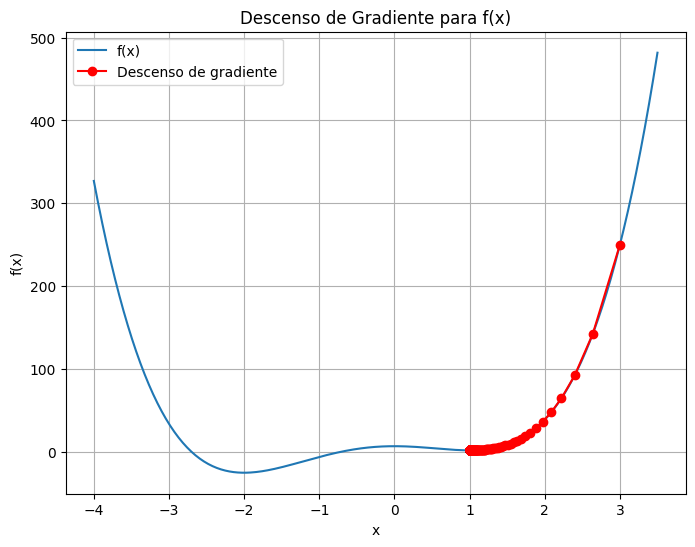

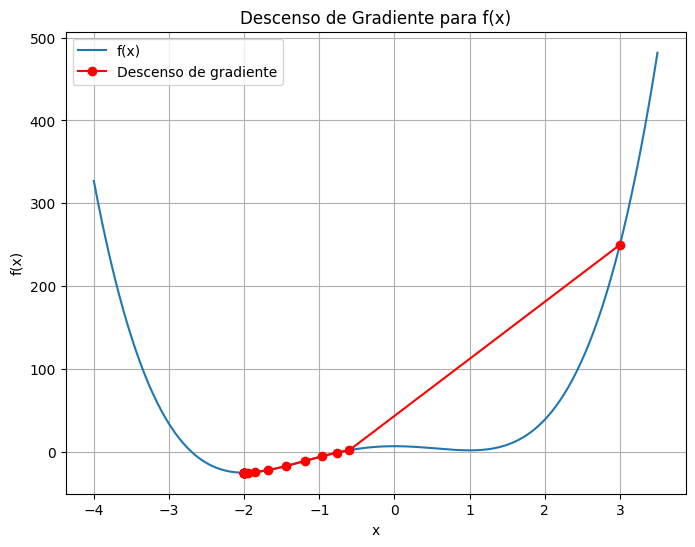

In [ ]:
grafica_descenso_gradiente(f, hist1, x_min=-4, x_max=3.5)
grafica_descenso_gradiente(f, hist2, x_min=-4, x_max=3.5)

III [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados
anteriores y comparalos con los minimos locales obtenidos analiticamente. 
¿Que influencia puede llegar a tener la eleccion del ratio de aprendizaje y?

Con un ratio mas pequeño me estoy desplazando mas lentamente, con lo cual la convergencia es en el punto 1, el cual es el minimo local que se encuentra primero. <br>
Con un ratio mas grande la convergencia es mucho mas rapida, y al pasarme de largo termina convergiendo a otro minimo local.<br>

IV [0.5 puntos] Aplica nuevamente el metodo sobre f (x) con x0 = 3, γ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.
x_inicial = np.array([3.0])

Convergencia alcanzada en iteración 3
Aproximación del mínimo para III: [-8.70499788e+13]
[[ 3.00000000e+00]
 [-3.30000000e+01]
 [ 4.17054000e+04]
 [-8.70499788e+13]]


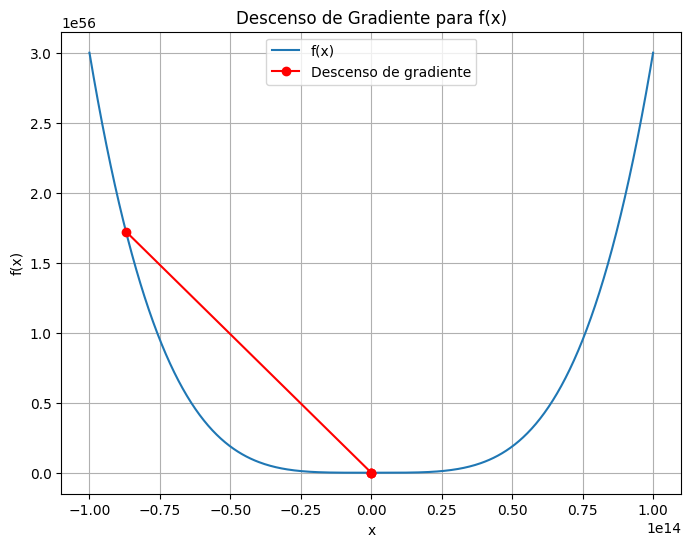

In [ ]:

solucion,hist3 = descenso_gradiente(f, x_inicial, y=0.1, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para III:", solucion)
print(hist3)
grafica_descenso_gradiente(f, hist3,x_min=-10.0e+13, x_max=10.0e+13)

No se encuentra un minimo para la función f(x) en el intervalo devido a que el salto dado por el aprendizaje pasa de largo los 2 minimos posibles. 

V [0.5 puntos] Finalmente, aplica el m ́etodo sobre f (x) con x0 = 0, γ = 0.001, tol=1e-12, maxit=1e5. 
Interpreta el resultado y comp ́aralo con el estudio analıtico de f. 
¿Se trata de un resultado deseable? ¿Por que? ¿A que se debe este fenomeno?

Convergencia alcanzada en iteración 1394
Aproximación del mínimo para IV: [-2.]
[[ 0.00000000e+00]
 [-3.99680289e-13]
 [-7.99360578e-13]] 
...
 [[-2.]
 [-2.]
 [-2.]]


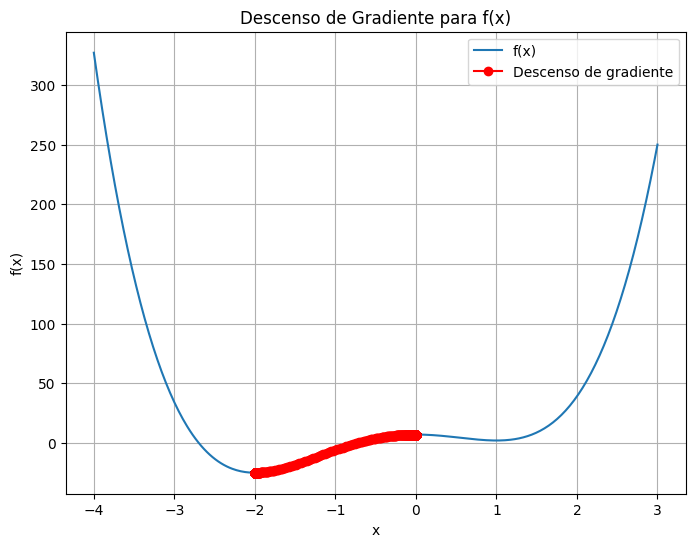

In [ ]:
x_inicial = np.array([0.0])
solucion,hist4 = descenso_gradiente(f, x_inicial, y=0.001, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para IV:", solucion)
print(hist4[:3],'\n...\n', hist4[-3:])
grafica_descenso_gradiente(f, hist4,x_min=-4, x_max=3)

En este caso ha termina en -2 que el minimo global de la funcion, entiendo que este es el caso ideal. Malo hubiera sido si hubiese terminado en el 1 que es un minimo local.

c) Sea la funcion g : R2 → R dada por g(x, y) = x2 + y3 + 3xy + 1.<br>


I- [0.5 puntos] Apl ́ıquese el m ́etodo sobre g(x, y) con x0 = (−1, 1), γ = 0.01,tol=1e-12, maxit=1e5.

In [ ]:
def grafica_descenso_gradiente_2var(f, hist):
    """
    Representa gráficamente el proceso del descenso de gradiente para una función de dos variables.
    """
    # Crear una malla para la superficie

    margin=0.5
    grid_points=100
    x_min, x_max = hist[:,0].min() - margin, hist[:,0].max() + margin
    y_min, y_max = hist[:,1].min() - margin, hist[:,1].max() + margin

    # Crear la malla para la superficie
    X, Y = np.meshgrid(np.linspace(x_min, x_max, grid_points),
                       np.linspace(y_min, y_max, grid_points))
    Z = f([X, Y])

    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Valor de f(x, y)')

    # Dibujar los pasos del descenso de gradiente
    plt.plot(hist[:,0], hist[:,1], marker='o', color='red', markersize=5, linewidth=2)
    plt.title("Descenso de Gradiente para f(x,y)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [ ]:
def grafica_descenso_gradiente_2var_3d(f, hist):
    """
    Representa gráficamente el proceso del descenso de gradiente para una función de dos variables en 3D.
    """
    # Crear una malla para la superficie

    margin=0.5
    grid_points=100
    x_min, x_max = hist[:,0].min() - margin, hist[:,0].max() + margin
    y_min, y_max = hist[:,1].min() - margin, hist[:,1].max() + margin

    # Crear la malla para la superficie
    X, Y = np.meshgrid(np.linspace(x_min, x_max, grid_points),
                       np.linspace(y_min, y_max, grid_points))
    
    
    Z = f([X, Y])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Superficie
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

    # Trayectoria del descenso de gradiente
    zs = [f([x, y]) for x, y in hist]
    ax.plot(hist[:,0], hist[:,1], zs, color='red', marker='o', label='Descenso de gradiente')

    ax.set_title("Descenso de Gradiente para f(x, y) en 3D")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    plt.show()

Convergencia alcanzada en iteración 2655
Aproximación del mínimo para g: [-2.25  1.5 ]


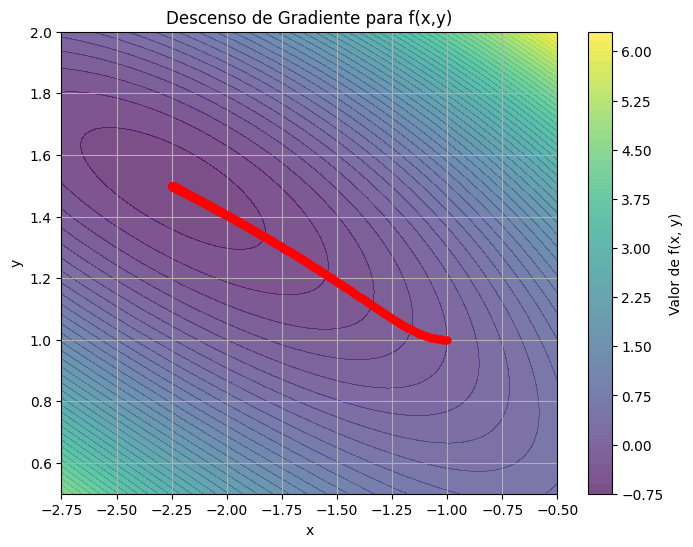

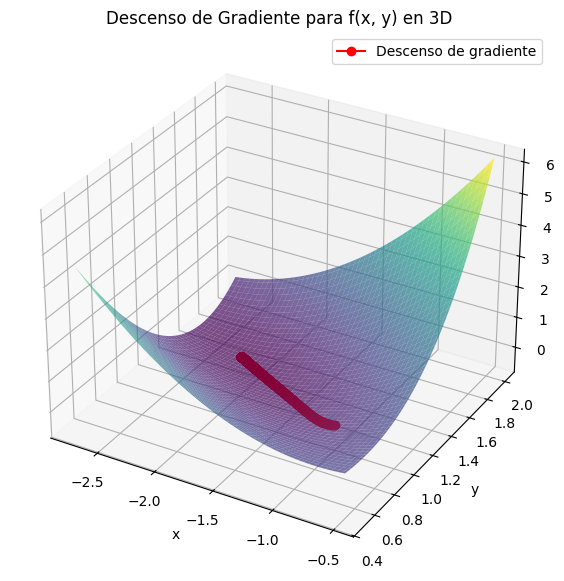

In [136]:
g = lambda v: v[0]**2 + v[1]**3 + 3 * v[0] * v[1] + 1
x_inicial = np.array([-1.0, 1.0])
solucion,hist5 = descenso_gradiente(g, x_inicial, y=0.01, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para g:", solucion)
grafica_descenso_gradiente_2var(g, hist5)
grafica_descenso_gradiente_2var_3d(g, hist5)

Entiendo que en este caso se encuentra un minimo local en [-2.25, 1.5]

II- [0.5 puntos] ¿Que ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultadodeseable?

Convergencia alcanzada en iteración 1134
Aproximación del mínimo para g con x0 = (0, 0): [ 2.33187000e+02 -1.08086391e+20]


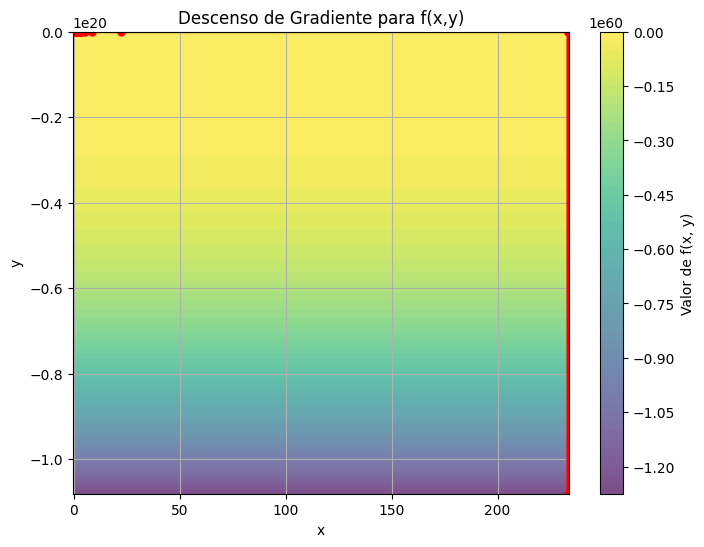

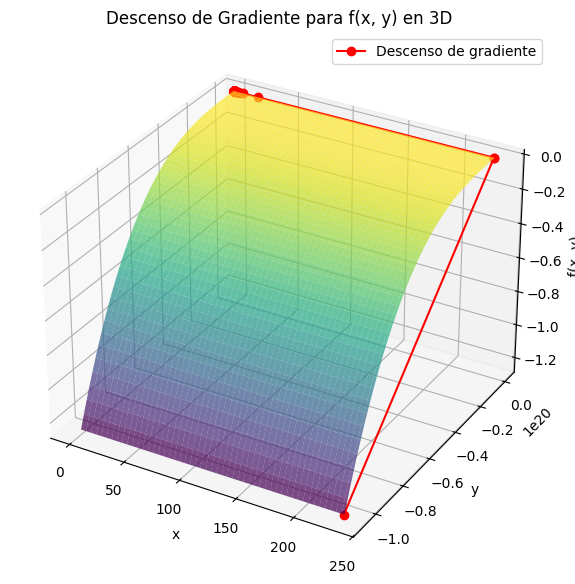

In [ ]:
x_inicial = np.array([0.0, 0.0])
solucion,hist6 = descenso_gradiente(g, x_inicial, y=0.01, tol=1e-12, maxit=100000)
print("Aproximación del mínimo para g con x0 = (0, 0):", solucion)
grafica_descenso_gradiente_2var(g, hist6)
grafica_descenso_gradiente_2var_3d(g, hist6)

En este caso no se obtiene un resultado deseable, ya que el punto inicial (0, 0) es un punto crítico de la función g(x, y), lo que significa que el gradiente en ese punto es cero.<br>
Por lo tanto, el algoritmo de descenso de gradiente no puede avanzar desde ese punto por lo cual no es posible encontrar un mínimo local.<br>
Esto representa la importancia de elegir un buen punto inicial para el descenso de gradiente.

III- [0.5 puntos] Realicese el estudio analitico de la funcion y utilicese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.


Dada la funcion g(x,y)=x**2 + y**3 + 3*x*y + 1 <br>
El gradiente ∇g(x,y) está compuesto por las derivadas parciales:

∂x/∂g = 2*x + 3*y<br>
∂y/∂g =3 y**2 +3*x<br>
∇g(0,0)=(0,0) por lo tanto este es un punto critico y no sirve para descenso de gradiente

∇g(−1,1)=[2(−1)+3(1)=1, 3(1)**2+3(−1)=3−3=0] = [1,0]<br>

El componente en y del gradiente es cero, por lo tanto inicialmente el punto se moverá solo en dirección x.<br>
La función tiene términos cúbicos en y**3, lo que significa que el paisaje tiene curvatura no uniforme.<br>
Dependiendo del paso α, el descenso podría:
Oscilar,Converger lentamente, o divergir si el paso es muy grande.<br>
En nuesto caso con el ratio de aprendizaje seleccionado termina convergiendo a un punto.

En conclusion:<br>
(0,0) es una mala eleccion por ser un punto critico con gradiente (0,0)<br>
(-1,1) es una eleccion valida y convergera dependiendo de ratio de aprendizaje seleccionado


